# 2D IR Spectra

In [1]:
import os
from Irspec2d import *
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

### Load data

In [2]:
mol = 'molname' # used to name the plots

path = 'data/uracil_3modes'
#path = 'data/uracil_deu_explD2O/'
freqmat = np.loadtxt('%s/freqsmat.txt' %(path))
transmat = np.load('%s/transmat.npy' %(path))


newmin = 1500
newmax = 2000
steps = 500

harm = None
if os.path.isfile('%s/transmatharm.npy' %(path)) and os.path.isfile('%s/freqsmatharm.txt' %(path)):
    harm = True                 
    
    freqmath = np.loadtxt('%s/freqsmatharm.txt' %(path))
    transmath = np.load('%s/transmatharm.npy' %(path))

### Calculate peaks

In [3]:
anharmcalc = calc_2dirsimple(freqmat,transmat)
exc, emi, ble = anharmcalc.calc_all_2d_process()

#harm = None
if harm:
    print()
    harmcalc = calc_2dirsimple(freqmath,transmath)
    exch, emih, bleh = harmcalc.calc_all_2d_process()

### Plot position of peaks

1638.4289794672309 1902.5288699051475
1639.8602314795817 1910.0894954163387


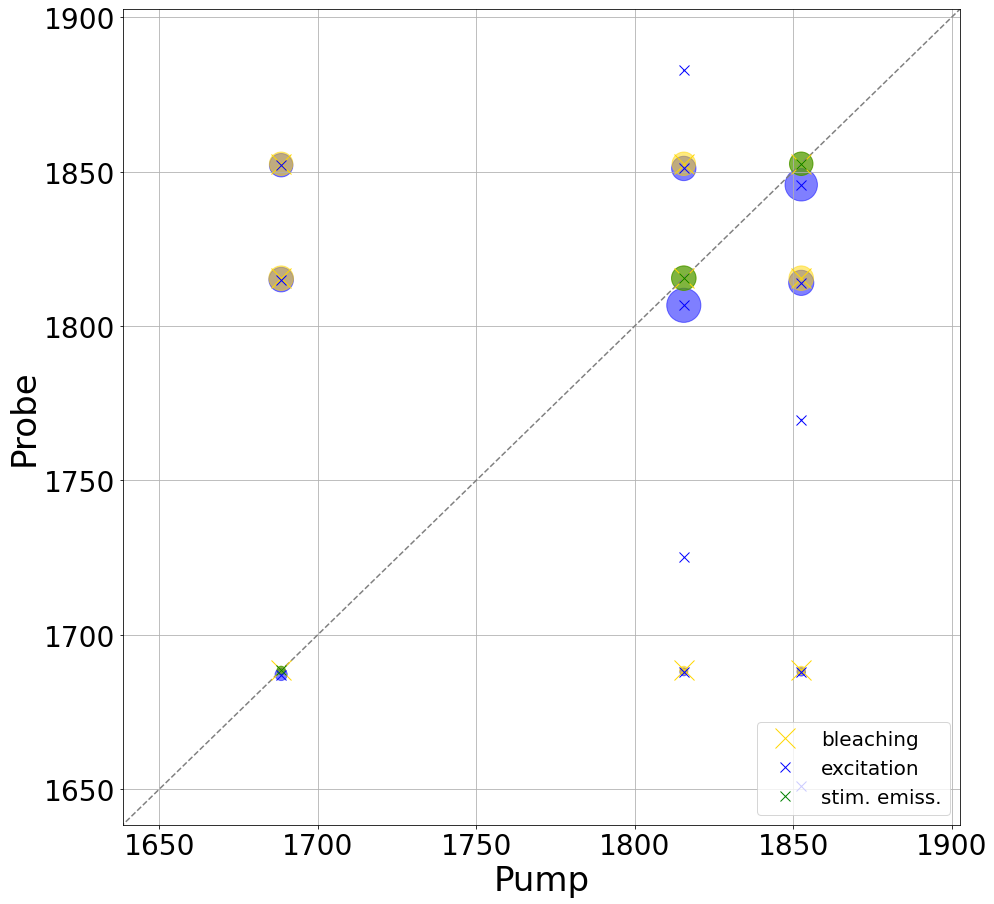

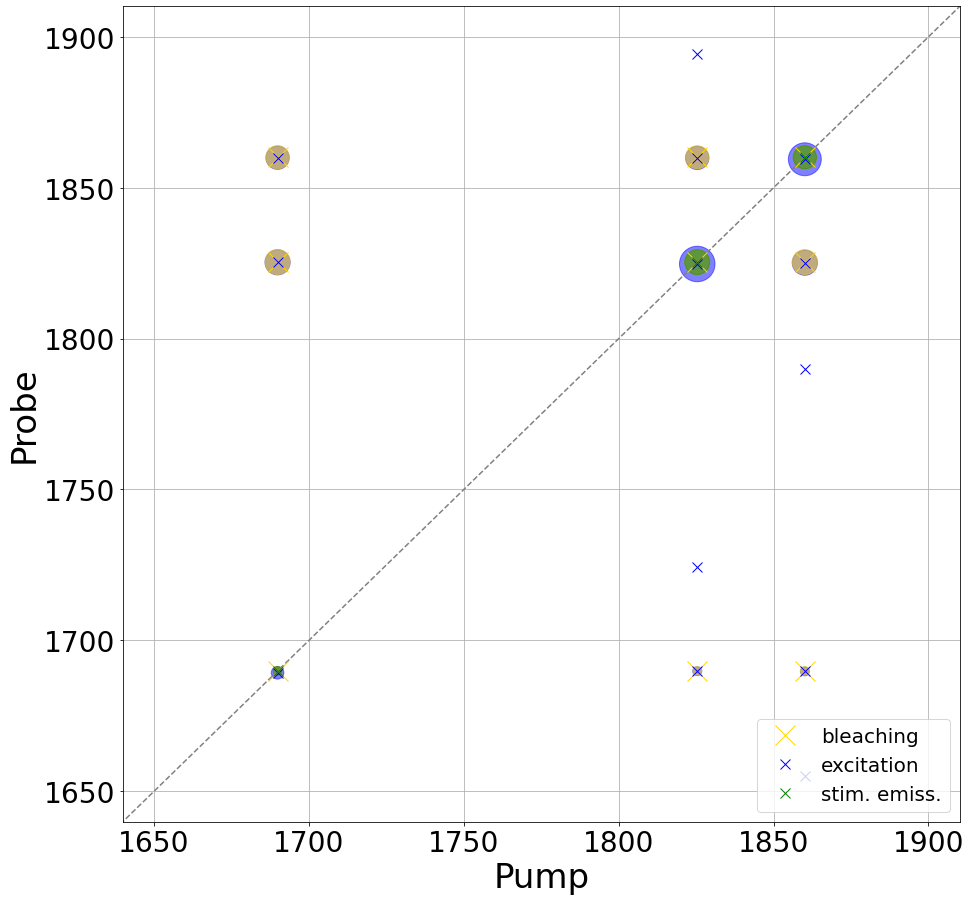

In [4]:
xmin = spectrum().find_xmin(freqmat) - 50
xmax = spectrum().find_xmax(freqmat,3) + 50
print(xmin,xmax)
spectrum().plot_2dspectrum_dots(xmin,xmax,exc,emi,ble)

if harm:
    xminh = spectrum().find_xmin(freqmath) - 50
    xmaxh = spectrum().find_xmax(freqmath,3) + 50
    print(xminh,xmaxh)
    spectrum().plot_2dspectrum_dots(xminh,xmaxh,exch,emih,bleh)

### Plot 2D spectrum

In [5]:
x,y,z = spectrum().calc_lorentz_spectrum2d(exc,emi,ble,newmin,newmax,steps)
z_val = spectrum().find_minmax(z)

if harm:
    xh,yh,zh = spectrum().calc_lorentz_spectrum2d(exch,emih,bleh,newmin,newmax,steps)
    z_valh = spectrum().find_minmax(zh)

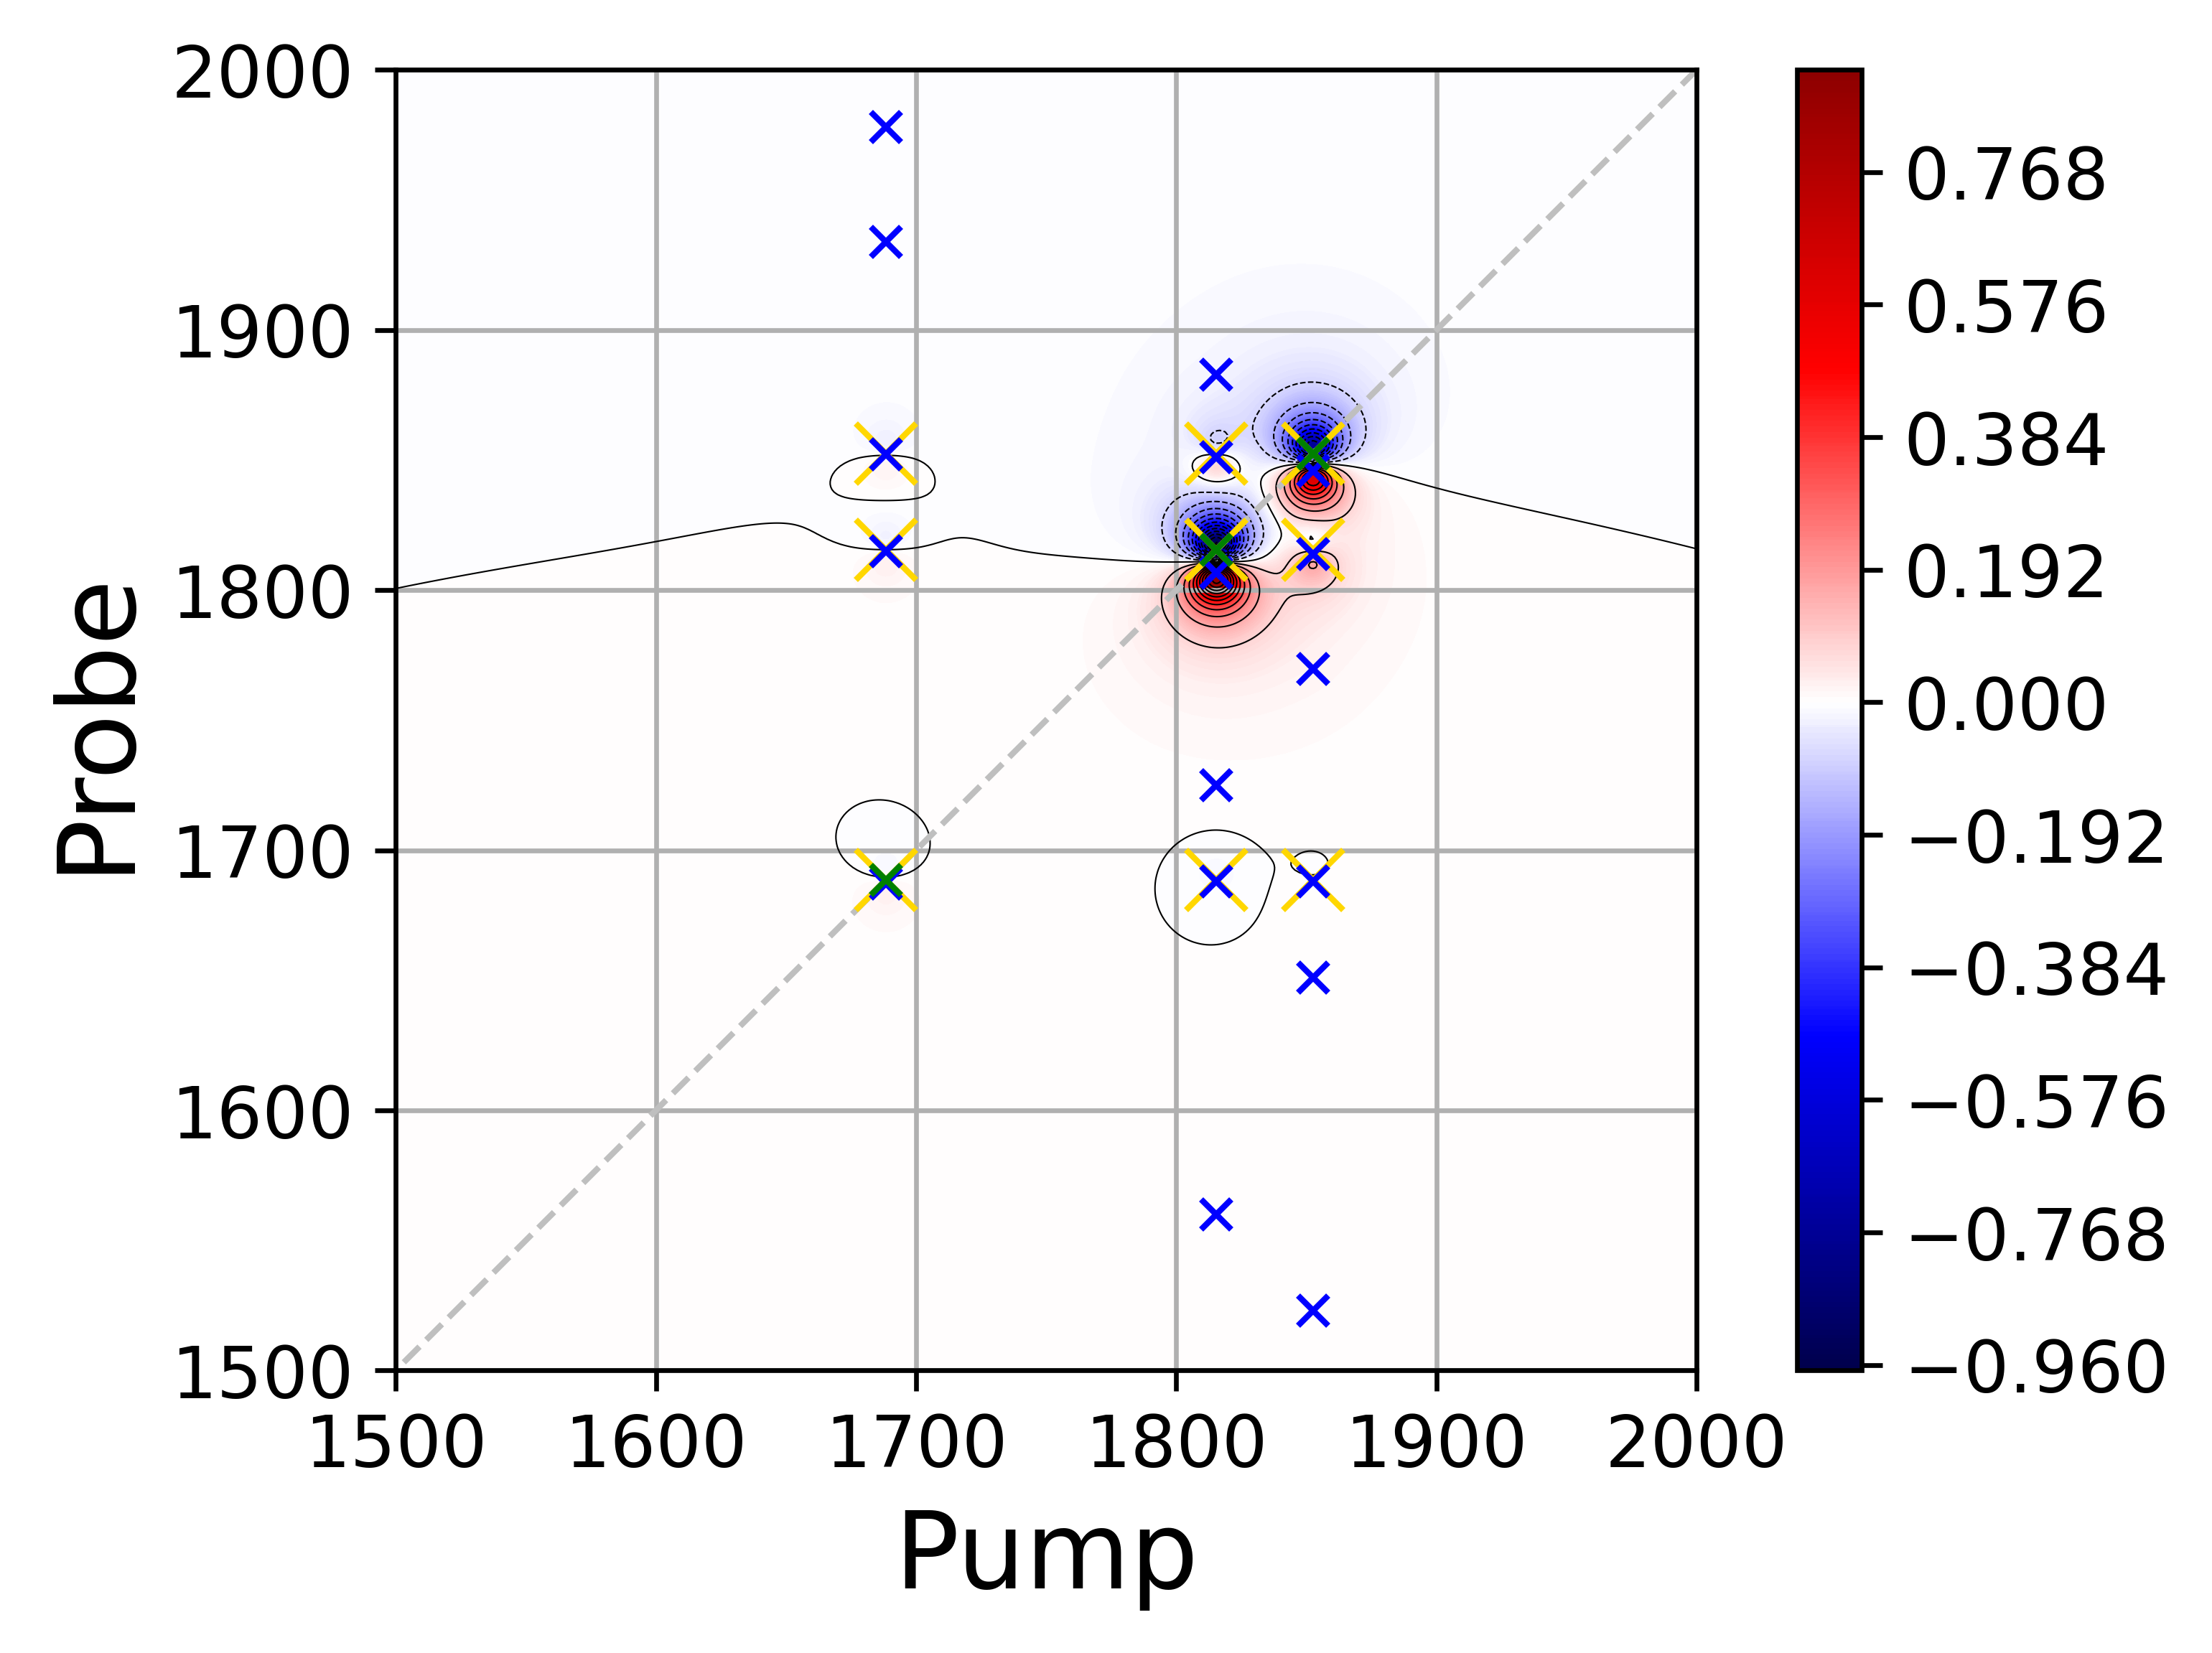

In [6]:
fig, ax = plt.subplots(dpi=600)
plt.plot([0,newmax], [0,newmax], ls="--", c="0.75", linewidth=1)

plt.grid(True)
ax.set_aspect(1./ax.get_data_ratio())

fig = plt.contourf(x,y,z, 500, alpha=1, cmap=plt.cm.seismic, vmax=z_val, vmin=-z_val)
CS = plt.contour(x,y,z,25,colors='k',linewidths=.25)

cbar = plt.colorbar(fig)
cbar.ax.tick_params(labelsize=12)
ax.tick_params(labelsize=12)
plt.xlabel('Pump', fontsize=18)
plt.ylabel('Probe', fontsize=18)
plt.xlim(newmin,newmax)
plt.ylim(newmin,newmax)

plt.plot(ble[0],ble[1], "x", color='gold', label='bleaching', markersize=10)
plt.plot(exc[0],exc[1], "bx", label='excitation', markersize=5)
plt.plot(emi[0],emi[1], "gx", label='stim. emiss.', markersize=5)


#plt.savefig('%s_anharm_lorentz.png' %(mol),bbox_inches='tight')

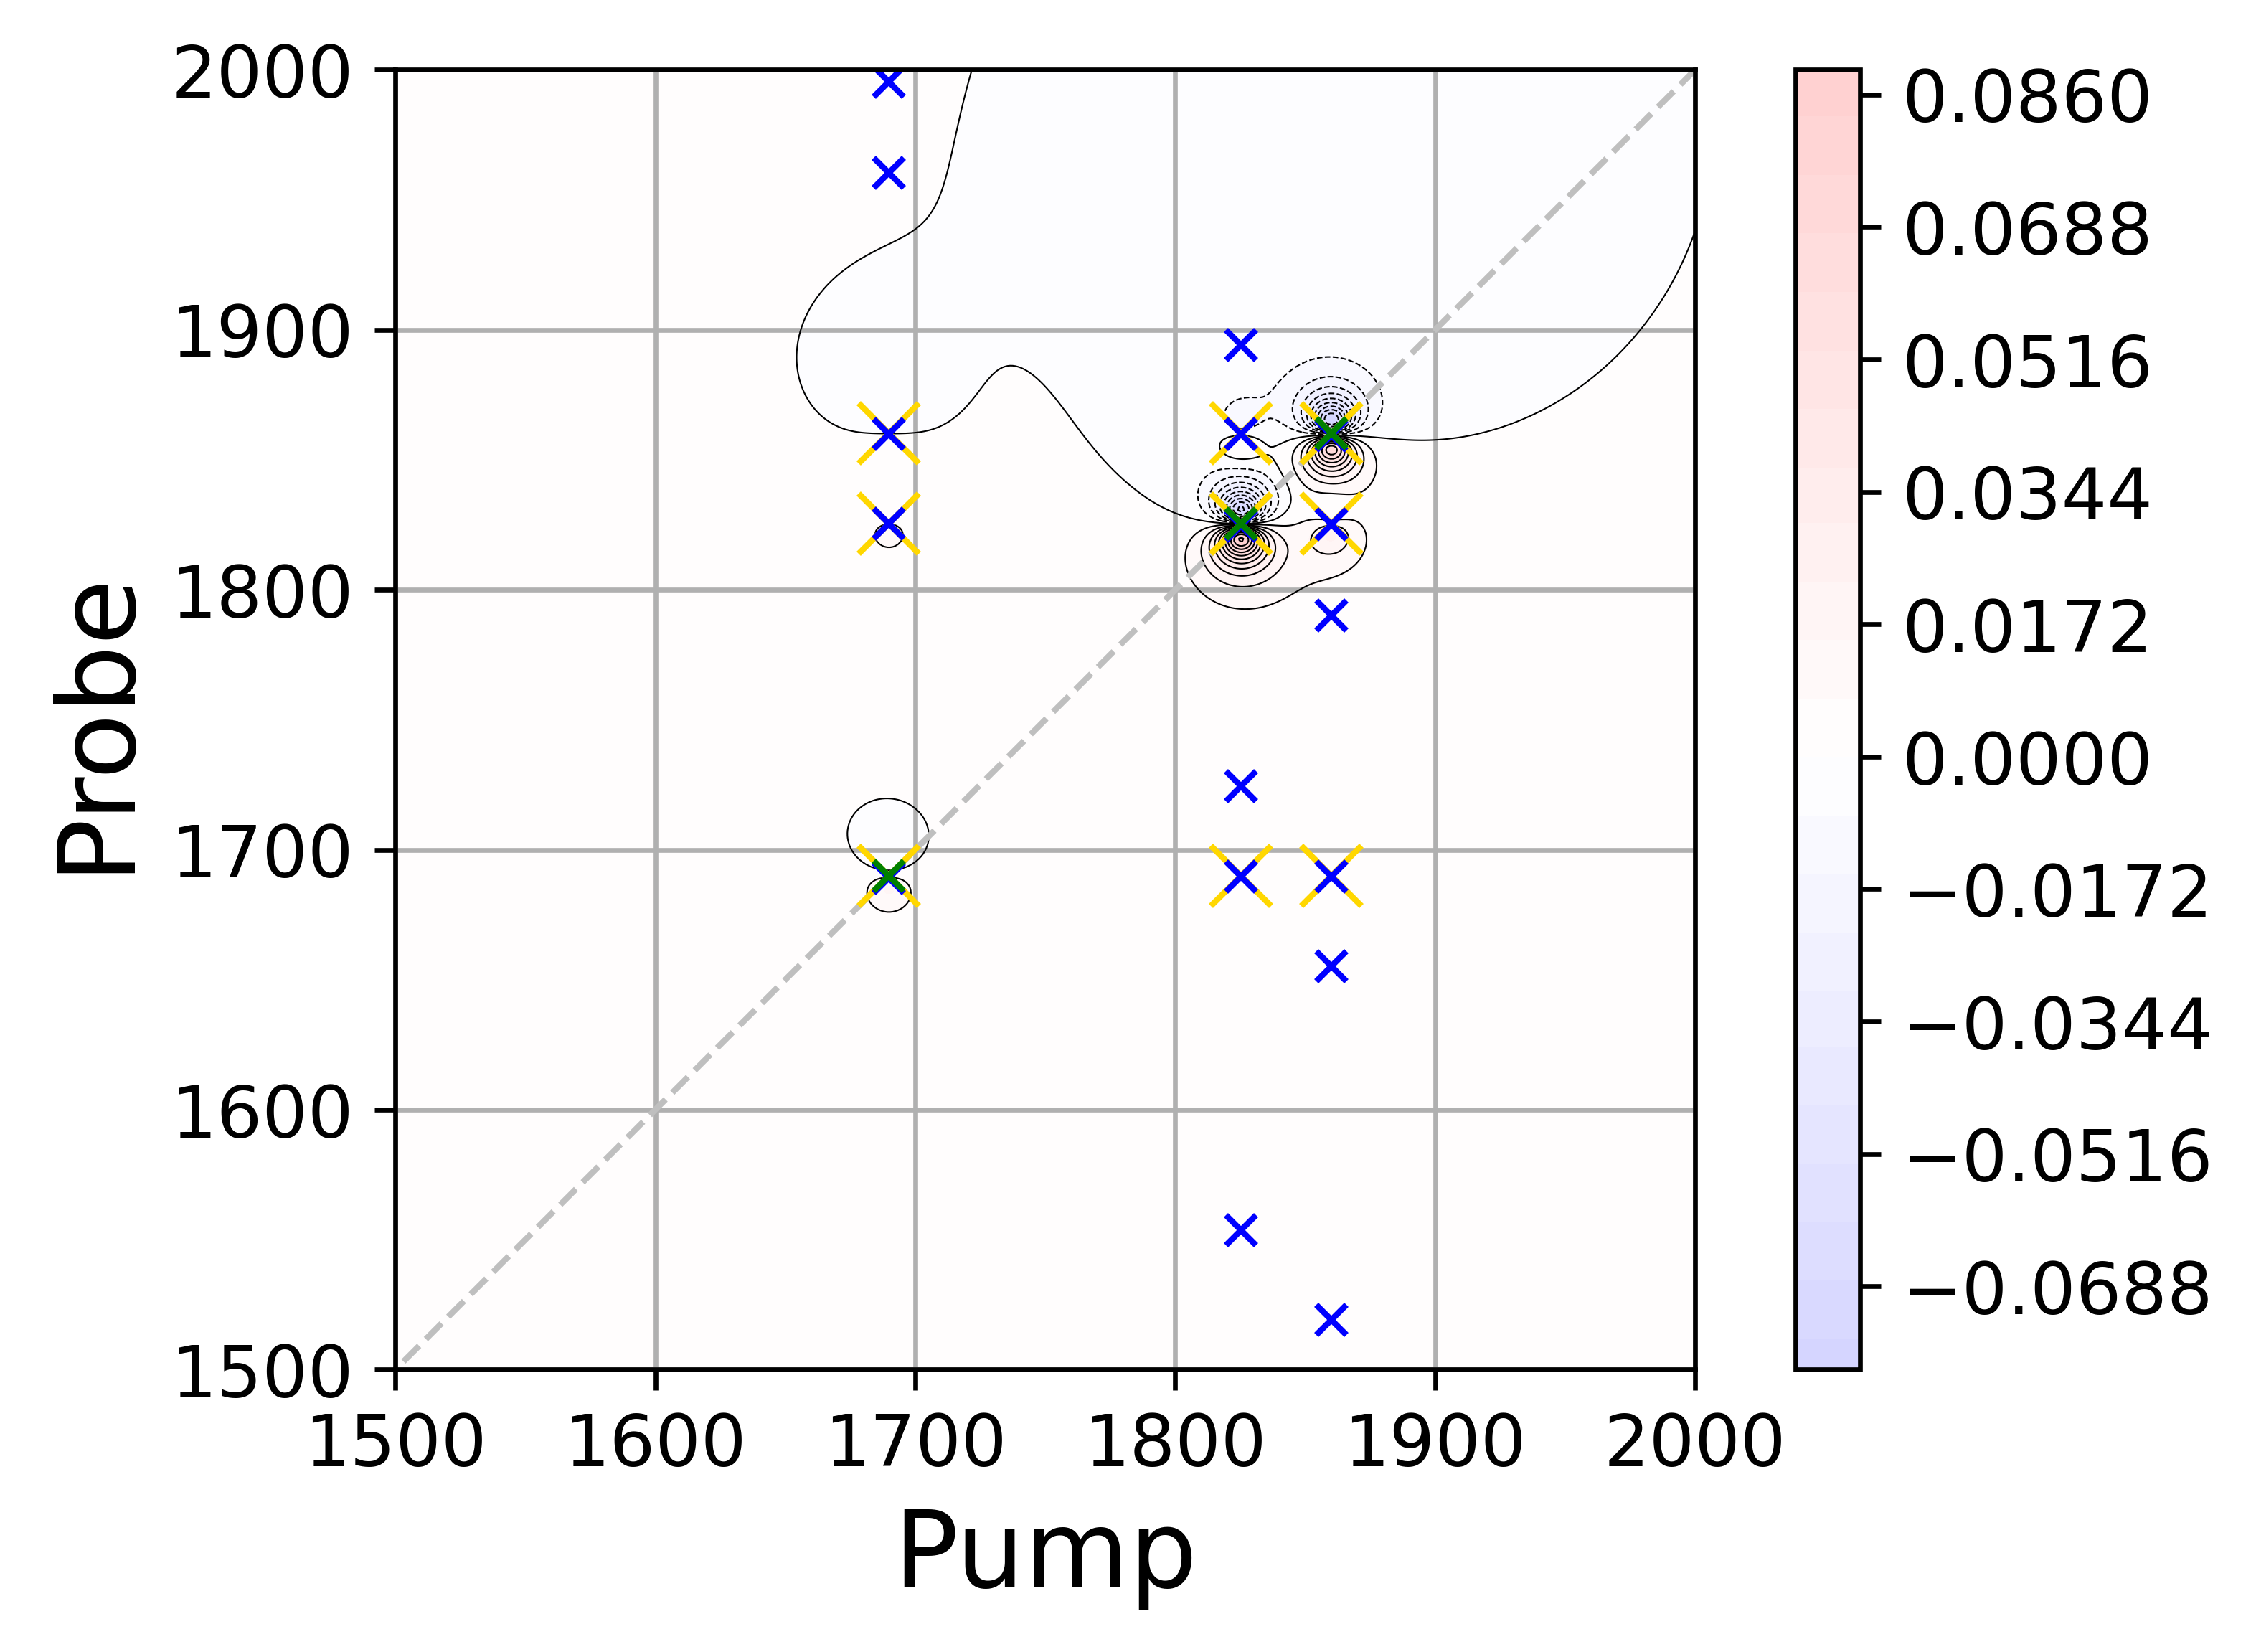

In [7]:
if harm:
    fig, ax = plt.subplots(dpi=600)
    plt.plot([0,newmax], [0,newmax], ls="--", c="0.75", linewidth=1)

    plt.grid(True)
    ax.set_aspect(1./ax.get_data_ratio())

    fig = plt.contourf(xh,yh,zh, 500, alpha=1, cmap=plt.cm.seismic, vmax=z_val, vmin=-z_val)
    CS = plt.contour(xh,yh,zh,25,colors='k',linewidths=.25)

    cbar = plt.colorbar(fig)
    cbar.ax.tick_params(labelsize=12)
    ax.tick_params(labelsize=12)
    plt.xlabel('Pump', fontsize=18)
    plt.ylabel('Probe', fontsize=18)
    plt.xlim(newmin,newmax)
    plt.ylim(newmin,newmax)

    plt.plot(bleh[0],bleh[1], "x", color='gold', label='bleaching', markersize=10)
    plt.plot(exch[0],exch[1], "bx", label='excitation', markersize=5)
    plt.plot(emih[0],emih[1], "gx", label='stim. emiss.', markersize=5)


    #plt.savefig('%s_harm_lorentz.png' %(mol),bbox_inches='tight')